<a href="https://colab.research.google.com/github/rhehdud/iqr-filtering-fashion-mnist/blob/main/%EC%86%8C%ED%98%95%EB%AA%A8%EB%8D%B8_%ED%95%99%EC%8A%B5%EC%9D%84_%EC%9C%84%ED%95%9C_IQR%EA%B8%B0%EB%B0%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%95%84%ED%84%B0%EB%A7%81_%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)

tf.config.experimental.enable_op_determinism()

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [2]:
techer_model = Sequential()
techer_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
techer_model.add(Conv2D(64, (3, 3), activation='relu'))
techer_model.add(MaxPooling2D(pool_size=(2, 2)))
techer_model.add(Dropout(0.2))
techer_model.add(Flatten())
techer_model.add(Dense(128, activation='relu'))
techer_model.add(Dropout(0.5))
techer_model.add(Dense(10))

techer_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
techer_model.summary()
techer_model.fit(x_train,
                 y_train,
                 epochs=10,
                 batch_size=64,
                 validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7640 - loss: 0.6689 - val_accuracy: 0.8861 - val_loss: 0.3199
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8780 - loss: 0.3398 - val_accuracy: 0.9010 - val_loss: 0.2684
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8958 - loss: 0.2862 - val_accuracy: 0.9084 - val_loss: 0.2465
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9090 - loss: 0.2483 - val_accuracy: 0.9084 - val_loss: 0.2454
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9154 - loss: 0.2272 - val_accuracy: 0.9131 - val_loss: 0.2334
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9247 - loss: 0.2029 - val_accuracy: 0.9108 - val_loss: 0.2353
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9288 - loss: 0.1887 - val_accuracy: 0.9208 - val_loss: 0.2281
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9363 - loss: 0.1700 - val_accuracy

In [3]:
logits = techer_model.predict(x_train)

loss_fn = keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
    )

per_sample_loss = loss_fn(y_train, logits).numpy()
print(f"per-sample loss shape : {per_sample_loss}")

q1 = np.percentile(per_sample_loss, 25)
q3 = np.percentile(per_sample_loss, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

IQR_indices = np.where(
    (per_sample_loss > lower_bound) & (per_sample_loss < upper_bound)
)[0]

x_train_IQR = x_train[IQR_indices]
y_train_IQR = y_train[IQR_indices]
N_IQR_samples = len(IQR_indices)

total_indices = np.arange(len(x_train))
random_indices = np.random.choice(total_indices, N_IQR_samples, replace=False)

x_train_random = x_train[random_indices]
y_train_random = y_train[random_indices]

print(f"Dataset A : {x_train_IQR.shape}")
print(f"Dataset B : {x_train_random.shape}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
per-sample loss shape : [ 3.0458342e-02 -0.0000000e+00  1.0547718e-01 ...  5.7220295e-06
  7.8461310e-03 -0.0000000e+00]
Dataset A : (48184, 28, 28, 1)
Dataset B : (48184, 28, 28, 1)


In [4]:
loss_series = pd.Series(per_sample_loss)

print("--- Loss Statistics Table (The 'Box' in numbers) ---")
loss_stats = loss_series.describe()
print(loss_stats)

--- Loss Statistics Table (The 'Box' in numbers) ---
count    60000.000000
mean         0.084186
std          0.330036
min         -0.000000
25%         -0.000000
50%          0.000121
75%          0.013325
max          7.414255
dtype: float64


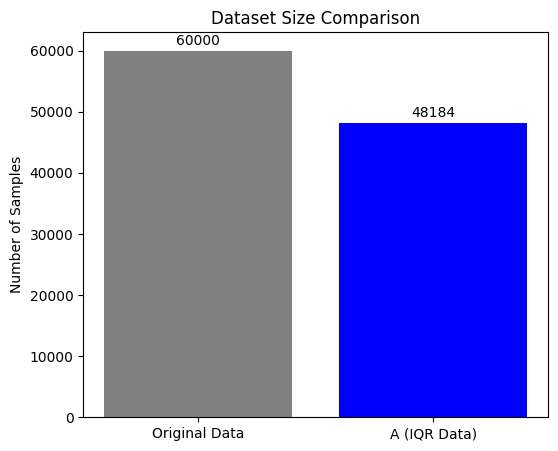

In [5]:
original_size = len(x_train)
IQR_size = N_IQR_samples

labels = ['Original Data', 'A (IQR Data)']
sizes = [original_size, IQR_size]

plt.figure(figsize=(6, 5))
bar_plot = plt.bar(labels, sizes, color=['gray', 'blue'])
plt.title('Dataset Size Comparison')
plt.ylabel('Number of Samples')

for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 500, f'{yval}', ha='center', va='bottom')

plt.show()

In [6]:
def create_student_model():
    student_model = Sequential()
    student_model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    student_model.add(MaxPooling2D(pool_size=(2, 2)))
    student_model.add(Dropout(0.2))
    student_model.add(Flatten())
    student_model.add(Dense(16,activation='relu'))
    student_model.add(Dropout(0.5))
    student_model.add(Dense(10,activation='softmax'))
    student_model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return student_model

model_IQR = create_student_model()
history_IQR = model_IQR.fit(x_train_IQR,
                 y_train_IQR,
                 epochs=15,
                 batch_size=64,
                 validation_data=(x_test, y_test))

model_random = create_student_model()
history_random = model_random.fit(x_train_random,
                 y_train_random,
                 epochs=15,
                 batch_size=64,
                 validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5011 - loss: 1.3343 - val_accuracy: 0.8075 - val_loss: 0.5878
Epoch 2/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7255 - loss: 0.7378 - val_accuracy: 0.8240 - val_loss: 0.5168
Epoch 3/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7572 - loss: 0.6630 - val_accuracy: 0.8324 - val_loss: 0.4984
Epoch 4/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7673 - loss: 0.6394 - val_accuracy: 0.8372 - val_loss: 0.4877
Epoch 5/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7839 - loss: 0.5981 - val_accuracy: 0.8428 - val_loss: 0.4700
Epoch 6/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7891 - loss: 0.5863 - val_accuracy: 0.8472 - val_loss: 0.4679
Epoch 7/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7944 - loss: 0.5654 - val_accuracy: 0.8482 - val_loss: 0.4592
Epoch 8/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7992 - loss: 0.5495 - val_accuracy: 0.

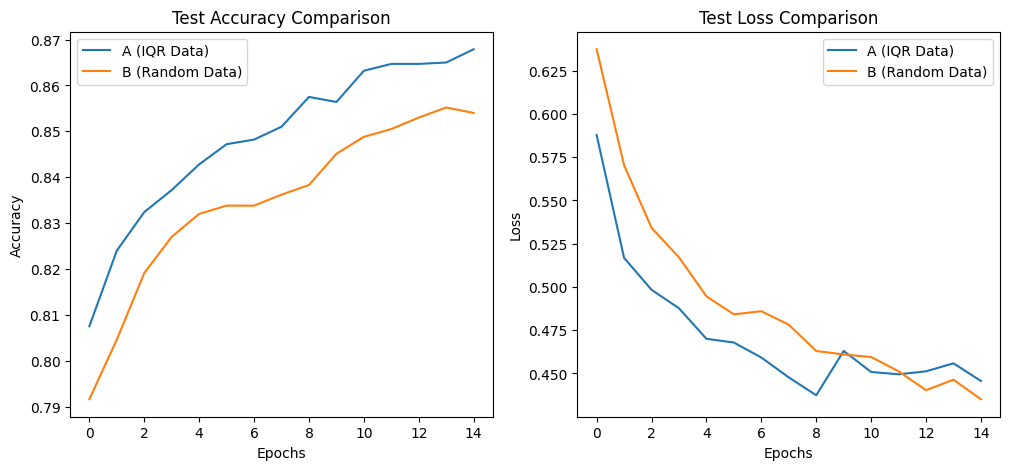

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_IQR.history['val_accuracy'], label='A (IQR Data)')
plt.plot(history_random.history['val_accuracy'], label='B (Random Data)')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_IQR.history['val_loss'], label='A (IQR Data)')
plt.plot(history_random.history['val_loss'], label='B (Random Data)')
plt.title('Test Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()